In [12]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import random
import scipy
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import accuracy_score

N = 1000
alphabet = string.ascii_lowercase + '#' + '.'
D = len(alphabet)
z = np.ones(N)

RI_pres = np.random.rand(D, N)
RI_pres = np.where(RI_pres>0.5, 1, -1)

RI_past = np.random.rand(D, N)
RI_past = np.where(RI_past>0.5, 1, -1)

def read_csv(filepath):
    category2word = {}
    key = 0
    present, past = [], []
    num_words = 0
    with open(filepath, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[0] == "#":
                category2word[key] = [present, past]
                key += 1;
                present, past = [], []
            else:
                present.append(row[0])
                past.append(row[1])
            num_words += 1
    return category2word, num_words

def ngram_encode(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    full_str = '#' + ngram_str + '.'
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)
            
        vec += trivec
    return vec

def ngram_encode_cl(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    full_str = '#' + ngram_str + '.'
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)     
        vec += trivec
    return 2* (vec + 0.1*(np.random.rand(letter_vecs.shape[1])-0.5) < 0) - 1

In [7]:
words = open("data/cleaned/latent_space.txt","r").read().split()

In [13]:
category2word, num_words = read_csv("data/cleaned/irregular_verbs_final_categorize.csv")

ngram_length 2
(30, 1000)
((30, 30), (30,), (1000, 1000))
(30, 2) (2, 2) (2, 1000) (2, 1000)
(30, 3) (3, 3) (3, 1000) (3, 1000)


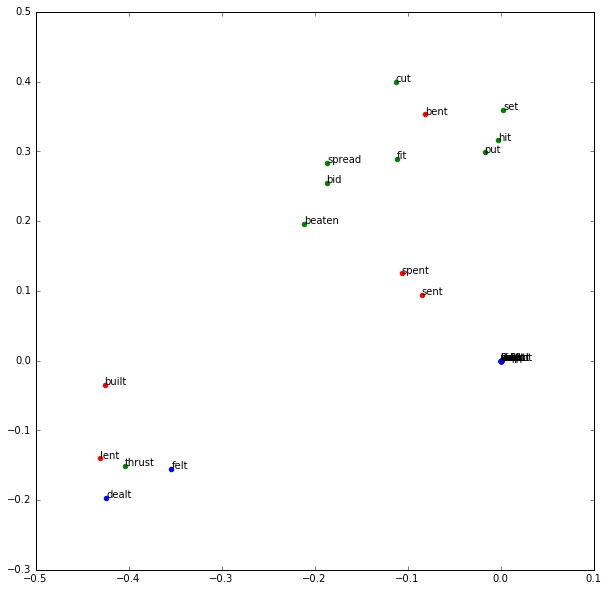

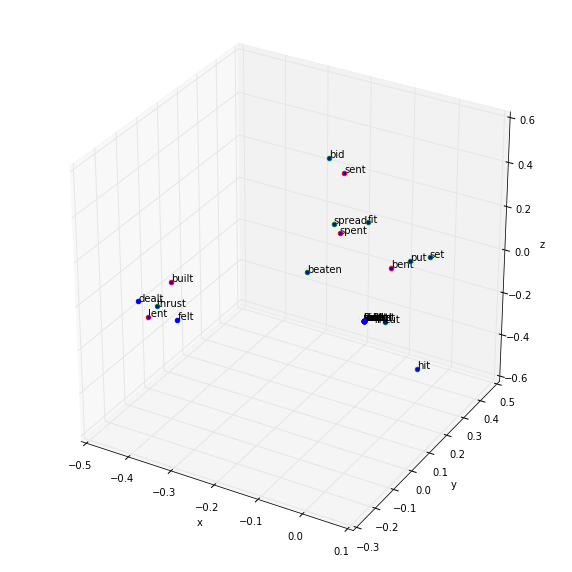

ngram_length 3
(30, 1000)
((30, 30), (30,), (1000, 1000))
(30, 2) (2, 2) (2, 1000) (2, 1000)
(30, 3) (3, 3) (3, 1000) (3, 1000)


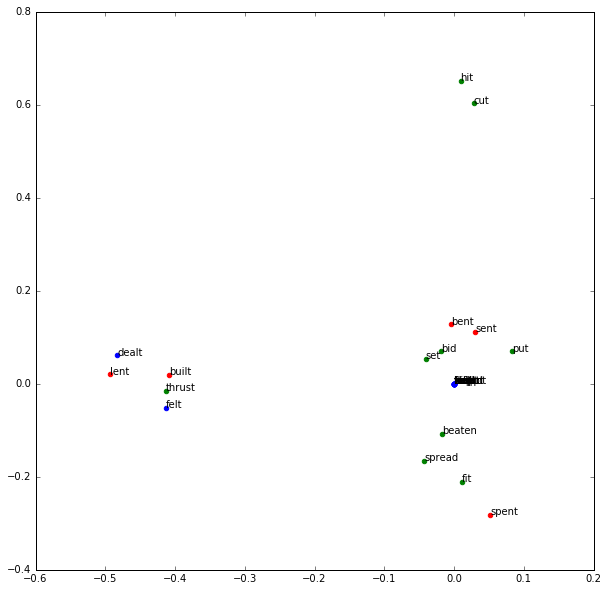

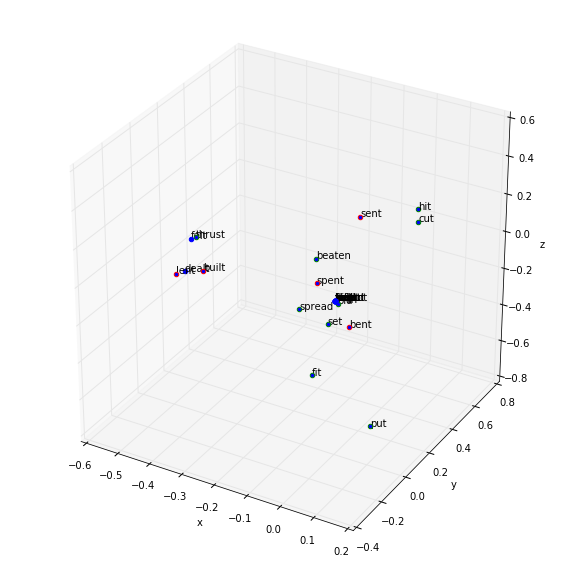

ngram_length 4
(30, 1000)
((30, 30), (30,), (1000, 1000))
(30, 2) (2, 2) (2, 1000) (2, 1000)
(30, 3) (3, 3) (3, 1000) (3, 1000)


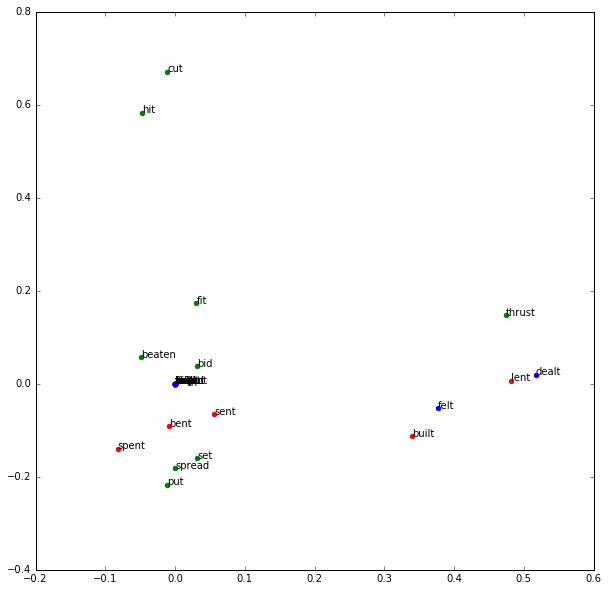

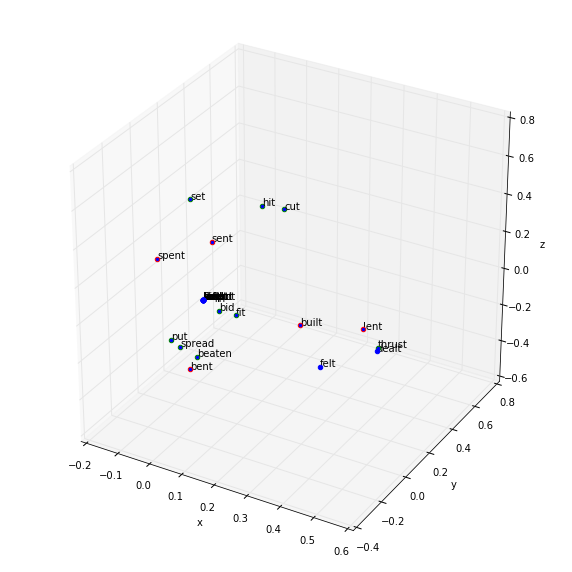

In [50]:
available_colors = ['green', 'red', 'blue', 'yellow', 'black']
# looking only at category 0, 1
selected_categories = [0, 1, 2]
num_diffs = 0
past = []
for c in selected_categories:
    num_diffs += len(category2word[c][0])
    past += category2word[c][1]
data_matrix = np.zeros((num_diffs, N))
ngram_lengths = [2, 3, 4]

for ngram_length in ngram_lengths:
    print "ngram_length %d" % ngram_length
    for c in selected_categories:
        num_subwords = len(category2word[c][0])
        for i in range(num_subwords):
            data_matrix[i] = ngram_encode_cl(category2word[c][1][i], RI_past, ngram_length) - ngram_encode_cl(category2word[c][0][i], RI_pres, ngram_length)
    print data_matrix.shape
    
    ds = [2, 3]

    U, s, V = np.linalg.svd(data_matrix, full_matrices=True)
    print (U.shape, s.shape, V.shape) 
    pca_data = []
    
    for d in ds:
        Ud = U[:, :d]
        Sd = s[:d]*np.eye(d)
        Vd = V[:d, :]
        SdVd = np.dot(Sd, Vd)
        print Ud.shape, Sd.shape, Vd.shape, SdVd.shape
        pca_data.append(Ud)
    
    # 2d
    fig, ax = plt.subplots(figsize=(10,10))
    i = 0
    for c in selected_categories:
        for txt in category2word[c][1]:
            ax.annotate(txt, (pca_data[0][i,0], pca_data[0][i,1]))
            ax.scatter(pca_data[0][i,0], pca_data[0][i,1], color=available_colors[c])
            i += 1
    plt.show()
    
    #3d
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    i = 0
    for c in selected_categories:
        for txt in category2word[c][1]:
            ax.text(pca_data[1][i,0], pca_data[1][i,1], pca_data[1][i,2], txt, size=10, zorder=1,  
 color='k') 
            ax.scatter(pca_data[1][i,0], pca_data[1][i,1], pca_data[1][i,2], color=available_colors[c])
            i += 1
       
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    pyplot.show()
    